<br>

**<font size="5">Table of contents</font>** 

 - [**Chapter 1: Introduction**](#Chapter1)
     - [**1.1 Goal**](#1.1)
     - [**1.2 Statistical methods**](#1.2)
     - [**1.3 Data and portfolio construction**](#1.3)
 - [**Chapter 2:  Simulation analysis Part 2**](#Chapter2)
    - [**2.1.Simulation Period: 01-01-1963 till 31-12-2003**](#2.1)
        - [**2.1.1 Mkt-RF**](#2.1.1)
        - [**2.1.2 HML**](#2.1.2)
        - [**2.1.3 WML**](#2.1.3)
        - [**2.1.4 HML-WML**](#2.1.4)
    - [**2.2.Simulation Period: 01-01-1927 till 31-12-2003**](#2.2)
        - [**2.2.1 Mkt-RF**](#2.2.1)
        - [**2.2.2 HML**](#2.2.2)
        - [**2.2.3 WML**](#2.2.3)
        - [**2.2.4 HML-WML**](#2.2.4)
    - [**2.3 Summarize Results**](#2.3)
        - [**2.3.1 Simulation Period: 01-01-1963 till 31-12-2003**](#2.3.1)
        - [**2.3.2 Simulation Period: 01-01-1927 till 31-12-2003**](#2.3.2)
 - [**Chapter 3:  Conclusion and discussion**](#Chapter3)
 - [**Chapter 4:  Limitations**](#Chapter4)
 - [**Chapter 5: References**](#Chapter5)


<a id='Chapter1'></a>
# Chapter 0: Introduction

<a id='1.1'></a>
## Goal
 
As a recap, in part 1, I constructed the portfolios and performed some exploratory data analysis. `The goal of this notebook is:` 

 - Try to answer whether recent performance of value and momentum is in line with historical performance. Several people have noticed that most factors did not deliver much return in the last 15 years. Are the value and momentum broken or just experiencing a period of bad luck? 


<a id='1.2'></a>
## Statistical methods 

To answer these question I use different simulation assumptions about the behavior of factor returns:


 - **Simulation under normality:** approximates factor returns by normal distributions
that I calibrate using the sample means and standard deviations from the full
sample.


- **The independent bootstrap:** 
resamples each factor’s return independently with replacement (i.e., allowing observations to
be chosen multiple times) from every other factor. This bootstrap scheme
preserves the empirical distributions of factor returns that is, it accounts for
deviations from normality, but does not account for serial correlations in factor returns.


- **Block bootstrap**: The independent bootstrap requires that the data being bootstrapped is independent and identically distributed (iid). This does not work well for time series, where serial correlation is present. One approach that addresses this limitation is block bootstrapping. There are several versions of the block bootstrap, I will look at the:  
<br> 
    - **Circular block bootstrap (CBB)**: is an improvement on the [**moving block bootstrap (MBB)**](https://www.youtube.com/watch?v=-M1UtvoajUY). The MBB randomly draws fixed overlapping blocks from the data and cut and pastes them to form a new series the same size as the original data. However, it has a major limitation in that beginning and ending points are systematically underrepresented. To address this limitation an extension to this method was developed called the Circular Block Bootstrap (CBB). This approach is much the same except that it wraps around the beginning and ending points to ensure they are drawn with similar probability as the other blocks. 
<br>

    - **Stationary bootstrap (SB)**: One limitation of the circular block bootstrap is the fixed block size. Different block sizes emphasize different periods or lengths of autocorrelation (memory). At the extremes you can take a block size so small that no serial correlation is captured, and at the other end you could take a block size so large that you end up sampling the original series. To address the fixed block sizes, the Stationary Bootstrap (SB) randomly samples blocks from a geometric distribution with mean $k$. The advantage of this approach is that the circular block bootstrap doesn't quite give us a stationary time series (The distribution of $R_{k-1:k}$ is not the same as the distribution of $R_{k:k+1}$). Averaging over the random choices of block lengths overcomes this problem.

Note that the  MBB, CBB, SB and all sample overlapping blocks in contrast, the **[fixed block bootstrap](https://scholar.google.be/scholar?hl=nl&as_sdt=0%2C5&q=Carlstein+%281986%29&btnG)** samples distinct blocks. I found an excellent implementation of these methods in the [**ARCH package**](https://arch.readthedocs.io/en/latest/bootstrap/timeseries-bootstraps.html). 

**Bootstrap implementation**

When bootstrapping the simulated paths for different investment horizons, I use the total length of the observed path to sample from. As a result, I obtain a  matrix where each column is a simulated path. Similar as **[Fama and French](https://academic.oup.com/raps/article-abstract/8/2/232/4810768)** I then calibrate the number of rows of this matrix depending on the investment horizon.

<a id='1.3'></a>
## Data and portfolio construction 

I will be using daily returns (possible to change to monthy) obtained from [**Kenneth French's data library**](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) for the US stock market (NYSE, AMEX, and NASDAQ) over the period  03/01/1927 to 28/02/2019. The data can be sourced directly from their website using [**Pandas datareader**](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html). Note thate the Fama-French returns are simple raw returns (not log returns). 

**As a reminder:**

 - A **value strategy** favors high fundamentals-to-price ratios by going long these stocks, while selling short those stocks
that have lower fundamentals-to-price ratios.
 - On the other hand, a **momentum strategy** exploits the phenomenon that securities which have performed well relative
to peers (winners) on average continue to outperform, and securities that have performed relatively poorly (losers) tend to
continue to under-perform.

**Long-Short Portfolio Construction:**

There are different ways to construct long-short value and momentum portfolio's. For now I will construct the portfolio's as **[Fama and French (2012)](https://www.sciencedirect.com/science/article/pii/S0304405X12000931)**:

  -  **Value Portfolio (HML):** 
 <br>
 
 - `book equity (BE)`
 - `market equity (ME)`
      
 is formed by first splitting the universe of stocks into two size categories: `Small (S)  and Big (B)` using NYSE market cap medians and then splitting stocks `into three groups based on book-to-market equity highest 30% (H), middle 40% (M), and lowest 30% (L)`, using NYSE breakpoints. The intersection of stocks across the six categories are value-weighed and used to form the portfolios SH (small, high $\frac{BE}{ME}$), SM (small, middle $\frac{BE}{ME}$), SL (small, low $\frac{BE}{ME}$), BH (big, high $\frac{BE}{ME}$), BM (big, middle $\frac{BE}{ME}$), and BL (big, low $\frac{BE}{ME}$). HML is the average of the two high book-to-market portfolios minus the average of the two low book-to-market portfolios. 

\begin{equation} \text{HML} =	\frac{1}{2}\times  (\text{Small High Value} + \text{Big High Value})
 - \frac{1}{2}\times (\text{Small Low Value} + \text{Big Low Value})\end{equation}

 - **Momentum portfolio (WML):** is constructed similarly to HML in which six value-weight portfolios formed on size and prior (2-12) returns to construct momentum. Specifically, prior (2-12) returns is defined as the past 12-month return, skipping the most recent months return to avoid micro-structure and liquidity biases and now generally used as the standard definition of momentum. The portfolios, which are formed daily, are the `intersections of 2 portfolios formed on size (market equity, ME) and 3 portfolios formed on prior (2-12) return`. The daily size breakpoint is the median NYSE market equity. The daily prior (2-12) return breakpoints are the 30th and 70th NYSE percentiles. Momentum is the average return on the two high prior return portfolios (Winners) minus the average return on the two low prior return portfolios (Losers)

\begin{equation} \text{WML} =	\frac{1}{2}\times  (\text{Small Winners} + \text{Big Winners})
 - \frac{1}{2}\times (\text{Small Losers} + \text{Big Losers})\end{equation}


 - **Value-Momentum portfolio (HML-WML)**: is a `60-40 weighting` of the value and momentum strategy (closer to a real 50-50 value and momentum).
 

 -  **Market portfolio (Mkt-RF):** represents the equity market risk premium, or aggregate equity return minus the risk free
rate. It is the return from simply being long equities at market capitalization weights and, unlike other factors, is not a
spread return between

Other common implementations of value and momentum are based on deciles and quintiles. For example, **[Moskowitz and Daniel (2016)](https://www.sciencedirect.com/science/article/pii/S0304405X16301490)** construct their momentum portfolios based on deciles where the winner portfolio is decile 1 and the loser portfolio decile 10. Formally, this can be represented as follow:

\begin{equation} \text{WML (Dec.)} =\text{Winners(D1)} - \text{Losers(D10)}\end{equation}


What follows is some of my initial experimentation with these simulation approaches along with some caveats. The analysis is organized as follow: in [**Chapter 1**](#Chapter4), I look at the recent past performance of these portfolios and examine whether this is in line with historical performance. Finally, in [**Chapter 2**](#Chapter5) and [**Chapter 3**](#Chapter6) , I summarize my conclusions and discusses limitations and some concerns about the study. 

At the top of each chapter I have declared which functions are being used. To keep the notebook as well-organized as possible, I have decided to put these functions into a separate file named `simulation_lib_log` . Furthermore, note that I use strategies, portfolios, factors interchangeably throughout the analysis. They all have the same interpretation. 

**<font size="5">Import libraries</font>**

In [1]:
# clear all variables each time you rerun the script
from IPython import get_ipython
get_ipython().magic('reset -sf')

# notebook settings
from pathlib import Path
import datetime
import os
import warnings
warnings.filterwarnings("ignore")
os.chdir("C:\\Users\Pieter-Jan\Documents\Factor_Crashes\Thesis\Images")

# scientific libraries
import pandas as pd
import numpy as np
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web

# plot libraries
import matplotlib.pyplot as plt
import seaborn as sns

# imports file with all custum functions
from importlib import reload
import simulation_log_lib
# instead of listing all individual functions, I have chosen to make a seperate 
# file which contains most functions
#reload(simulation_log_lib)
from simulation_log_lib import *

# plot parameters
sns_params = {
    'font.family': 'serif',
    'font.size': 12,
    'font.weight': 'medium',
    'figure.figsize': (10, 7),
}
plt.style.use('seaborn-talk')
plt.style.use('bmh')
sns.set_context(sns_params)
savefig_kwds = dict(dpi=300, bbox_inches='tight', frameon=True, format='png')
set2 = [
    '#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', '#CC79A7', '#56B4E9'
]
#plt.style.available
#sns.set(style='darkgrid', context='talk')
%matplotlib inline

**<font size="4">Global parameters</font>**

Global parameters are defined in CAPITAL LETTERS. This makes it is easy to quickly change from daily data to monthly and some other parameters.

In [2]:
# data frequency, easy to change between month and daily data
FREQUENCY = 252  # assuming 252 trading days in a year
N_PATHS = 10_000  # nr ob paths (bootstraps)
BLOCKSIZE = 126  # blocksize, for the stationary bootstrap this is the mean of the geometric distribution
START_YEAR = 1927  # start year when sourcing the portfolios from FAMA AND FRENCH
PLOT_INTERMEDIATE = False  # plots intermediate histograms when calling the simulation methods
np.random.seed(31415)  #random state

# Portfolio names from FAMA AND FRENCH ; to switch to monthly just remove '_daily'
VALUE = '6_Portfolios_2x3_daily'
MOMENTUM = '6_Portfolios_ME_Prior_12_2_daily'

# path to read in the data
PATH_DATA = 'C:\\Users\\Pieter-Jan\\Documents\\Factor_Crashes\\Code\\Simulation\\Portfolios\\'

In [3]:
df_factors = pd.read_csv(PATH_DATA + "portfolios.csv").set_index("Date")
df_factors.index = df_factors.index.astype('datetime64[ns]')

# convert to log space
df_factors_log = np.log(1 + df_factors / 100) * 100
df_factors_log.head()

Mkt-RF       HML       WML   HML-WML    RF
Date                                                    
1927-01-03 -0.793137  0.084964  0.034994  0.064979  0.01
1927-01-04  0.309520 -0.682323 -0.190181 -0.485175  0.01
1927-01-05  0.139902 -0.310481 -0.481156 -0.378716  0.01
1927-01-06 -0.170145  0.074972 -0.150113 -0.015001  0.01
1927-01-07  0.299551  0.439035  0.637961  0.518653  0.01

**<font size="4">Performance functions</font>**

some anonymous function to calculate various (performance) statistics,
these functions are stored in a dictionary

In [4]:
"""
some anonymous function to calculate various (performance) statistics,
these functions are stored in a dictionary

params:

    - df: pandas dataframe with the raw returns
    - time_freq: an integer indicating the number of trading days
    - treshold: a float determining the level of drawdown is taken into account
      when calculating the percentage of time an investment is in a drawdown state


returns:

    - numpy array with the calculted statistic
"""


def P_Ar(time_freq=FREQUENCY, df=None):    return\
np.mean(df.values, axis=0)*time_freq


def P_Gr(time_freq=FREQUENCY, df=None):    return \
(np.exp(time_freq*np.mean(df.values/100, axis=0))-1)*100


def P_Avol(time_freq=FREQUENCY, df=None):    return \
np.std(df.values, axis=0) * np.sqrt(time_freq)


def P_Gvol(time_freq=FREQUENCY, df=None):    return \
(np.exp(np.sqrt(time_freq)*np.std(df.values/100, axis=0))-1)*100


# put functions into a dictionary, so we can choose which one to call
perf_stats_dic = {
    
    "Count":
    lambda df=None:df.describe().loc["count",:].values,
    "Skew":
    lambda df=None: df.skew().values,
    "Kurtosis":
    lambda df=None: df.kurtosis().values,
    "Median":
    lambda df=None: np.median(df.values, axis=0),
    "Mean":
    lambda df=None: np.mean(df.values, axis=0),
    "SD":
    lambda df=None: np.std(df, axis=0),
    "Terminal Wealth Relative":
    lambda df=None: np.exp((df / 100).cumsum()).iloc[-1, :] - 1,
    "Median Return (%)":
    lambda time_freq=FREQUENCY, df=None: np.median(df, axis=0) * FREQUENCY,
    "Arithmetic Return (%)":
    lambda time_freq=FREQUENCY, df=None: P_Ar(df=df, time_freq=time_freq),
    "Geometric Return (%)":
    lambda time_freq=FREQUENCY, df=None: P_Gr(df=df, time_freq=time_freq),
    "Arithmetric Volatility (%)":
    lambda time_freq=FREQUENCY, df=None: P_Avol(df=df, time_freq=time_freq),
    "Geometric Volatility (%)":
    lambda time_freq=FREQUENCY, df=None: P_Gvol(df=df, time_freq=time_freq),
    "Arithmetic SR":
    lambda time_freq=FREQUENCY, df=None: P_Ar(df=df, time_freq=time_freq) /
    P_Avol(df=df, time_freq=time_freq),
    "Geometric SR":
    lambda time_freq=FREQUENCY, df=None: P_Gr(
        df=df, time_freq=time_freq) / P_Gvol(df=df, time_freq=time_freq),
    "Kappa Ratio":
    lambda threshold_risk=0, threshold_return=0, order=3, time_freq=FREQUENCY,
    df=None: kappa_ratio(threshold_risk=threshold_risk,
                         threshold_return=threshold_return,
                         order=order,
                         time_freq=time_freq,
                         df=df),
    "Max Drawdown (%)":
    lambda df=None: np.max(drawdown(df=df), axis=0) * 100,
    "Calmar Ratio":
    lambda time_freq=FREQUENCY, df=None: P_Ar(df=df, time_freq=time_freq) / (
        np.max(drawdown(df=df), axis=0) * 100),
    "Max TUW (Year)":
    lambda time_freq=FREQUENCY, df=None: np.max(np.apply_along_axis(
        max_time_dd, 0, drawdown(df=df)),
                                                axis=0) / time_freq,
    "Underwater (%)":
    lambda df=None: np.sum(drawdown(df=df) != 0, axis=0) / len(df) * 100,
    f"(%) Underwater >{20} %":
    lambda treshold=0.20, df=None: np.sum(drawdown(df=df) > treshold, axis=0
                                          ) / len(df) * 100
}

In [5]:
round(
    perf_stat(df=df_factors_log.iloc[:, :4],
              dic_perf=perf_stats_dic,
              all_stats=True), 3)

Mkt-RF        HML        WML    HML-WML
Count                       24302.000  24302.000  24302.000  24302.000
Skew                           -0.419      0.593     -1.945     -0.232
Kurtosis                       17.413     15.024     34.678     15.261
Median                          0.060      0.005      0.060      0.028
Mean                            0.023      0.014      0.024      0.019
SD                              1.067      0.584      0.749      0.423
Terminal Wealth Relative      293.657     27.198    318.504     99.842
Median Return (%)              15.115      1.260     15.115      7.055
Arithmetic Return (%)           5.896      3.463      5.980      4.784
Geometric Return (%)            6.073      3.523      6.162      4.900
Arithmetric Volatility (%)     16.935      9.274     11.886      6.711
Geometric Volatility (%)       18.453      9.718     12.621      6.941
Arithmetic SR                   0.348      0.373      0.503      0.713
Geometric SR                    0.329      0.363      0.488      0.706
Kappa Ratio                     0.716      0.862      0.892      1.514
Max Drawdown (%)               84.802     46.788     69.927     39.256
Calmar Ratio                    0.070      0.074      0.086      0.122
Max TUW (Year)                 18.369     10.508     28.845     10.405
Underwater (%)                 93.264     95.387     93.922     92.178
(%) Underwater >20 %           38.659     17.101     43.610     16.139

<a id='Chapter2'></a>
# Chapter 2 Simulation Analysis Part 2

## Recent poor performance of the Momentum and Value factor 

The figure below shows that value and momentum factor did not deliver much return
in the **last 15 years (01-01-2004 to 28-02-2019)**. Are these factors broken or just experiencing a period of bad luck? To answer this question, I examine the role of bad luck in explaining the recent poor performance of factors. I start with measuring the performance of each factor over the last 15 years
ending February 2019 and use simulations to assess the likelihood of observing this level of
performance, given how the factors performed before these recent years. I compare factor performance from **January 2004** through **February 2019** to performance from:
 - **July 1963 through December 2003**. 
 - **January 1927 through December 2003**
 
Similar as in Chapter 3, I then simulate returns under different assumptions to assess which features of factor returns, if any, can account for their poor recent performance. Some Papers **only include data starting from 1963** because they argue that the period before is not representative anymore due to higher volatility. Therefore, I will analyze both periods separately and look whether there are notable differences. **The number of simulations is set at 10,000. and the blocksize and mean blocksize are both 126 days**. Finally, the bootstrap samples where I calculate the statistic of interest on are based on an investment horizon of 15 years.

**<font size="4">Helper functions (defined in a seperate file `simulation_log_lib`)</font>**

 - `Return_DD:` plots the cumulative return and drawdown among each other
 - `perf_stat:` appends the performance statistics in a pandas data frame
 - `Simulation`: class with the bootstrapping (simulation) methods
     -  normal
     - iid bootstrap
     - moving block bootstrap
     - circular block bootstrap
     - stationary bootstrap
 - `permutation_plot`: density plot of the permuted statistic(s)
 - `p_table:`appends the p-values for different statistics , investment horizons, 
    strategies and simulation methods in a table

### Performance over the last recent 15 years

In [6]:
dic_fac = {
    "Mkt-RF": "Market minus risk free rate (Mkt-RF)",
    "HML": "Value (HML)",
    "WML": "Momentum (WML)",
    "HML-WML": "Value Momentum (HML-WML)",
    "RF": "Risk Free rate"
}

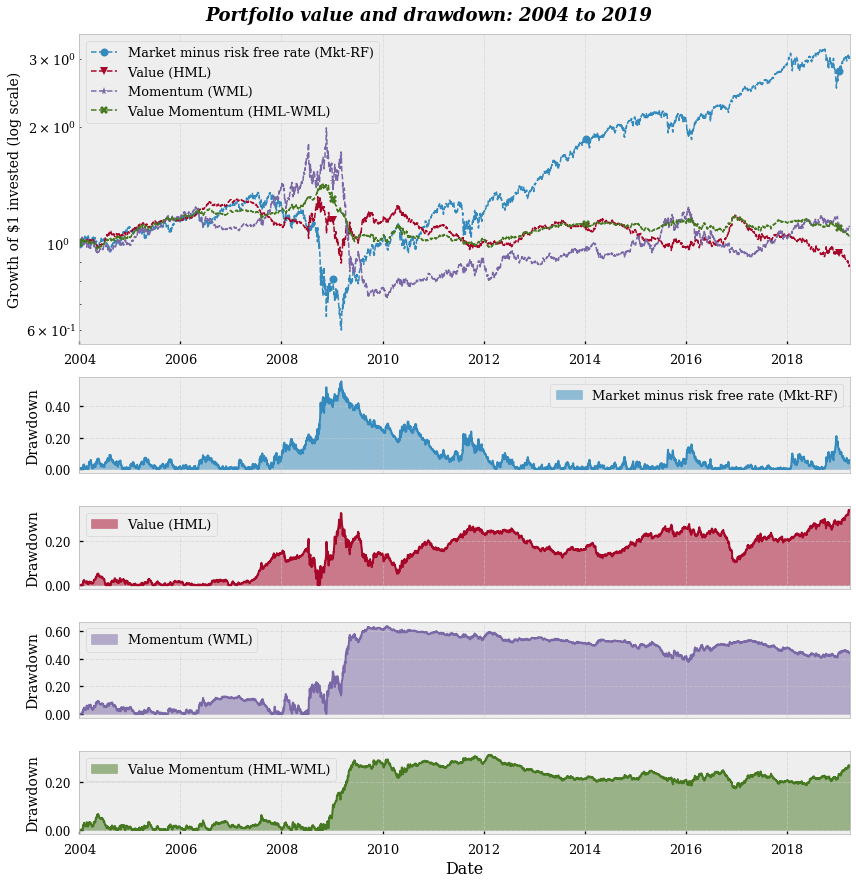

In [7]:
start = datetime.date(year=2004, month=1, day=1)
df_15 = df_factors_log.loc[start:]
Return_DD(df=df_15, dic_labels=dic_fac, time_frequency=FREQUENCY)

In [8]:
round(
    perf_stat(df=df_15.iloc[:, :4], all_stats=True, dic_perf=perf_stats_dic),
    3)

Mkt-RF       HML       WML   HML-WML
Count                       3836.000  3836.000  3836.000  3836.000
Skew                          -0.393     0.519    -0.984    -0.334
Kurtosis                      10.514    10.548    11.779     3.161
Median                         0.070    -0.015     0.055     0.018
Mean                           0.029    -0.004     0.003     0.001
SD                             1.160     0.624     0.924     0.361
Terminal Wealth Relative       2.047    -0.126     0.103     0.045
Median Return (%)             17.634    -3.780    13.856     4.536
Arithmetic Return (%)          7.319    -0.883     0.642     0.287
Geometric Return (%)           7.593    -0.879     0.644     0.287
Arithmetric Volatility (%)    18.407     9.908    14.669     5.731
Geometric Volatility (%)      20.210    10.416    15.799     5.899
Arithmetic SR                  0.398    -0.089     0.044     0.050
Geometric SR                   0.376    -0.084     0.041     0.049
Kappa Ratio                    0.851    -0.207     0.087     0.118
Max Drawdown (%)              55.814    33.886    63.682    31.214
Calmar Ratio                   0.131    -0.026     0.010     0.009
Max TUW (Year)                 4.698    10.508    10.333    10.405
Underwater (%)                90.459    96.507    97.106    96.820
(%) Underwater >20 %          13.582    35.532    67.440    59.411

### Performance  before the last 15 years starting from 1963

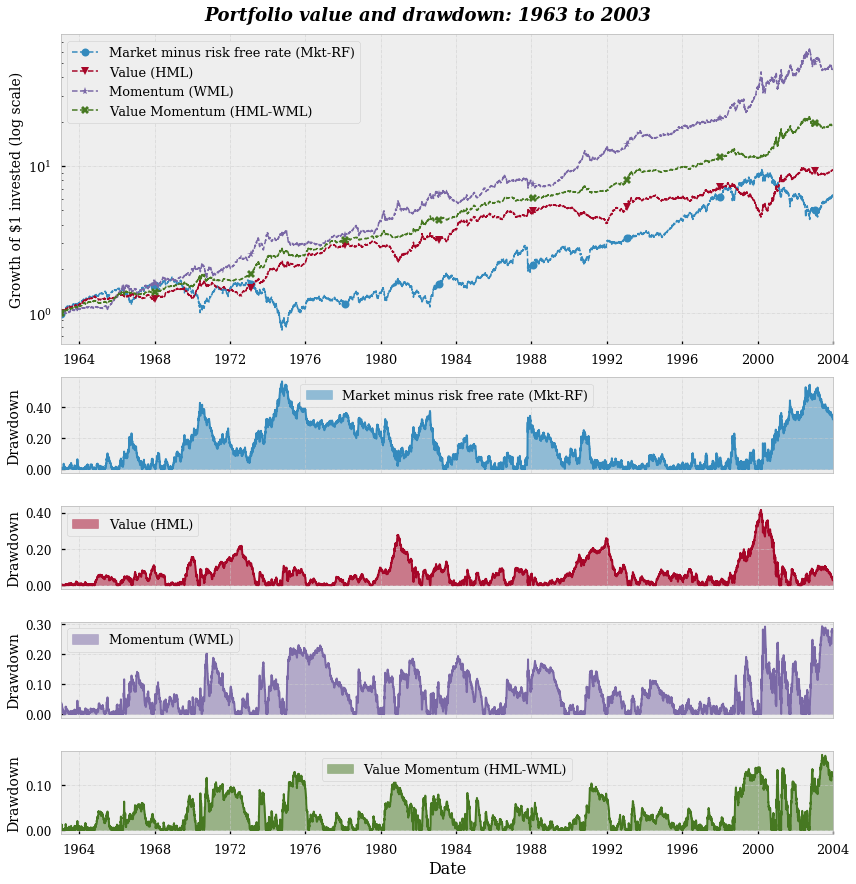

In [9]:
start, end = datetime.date(year=1963, month=1, day=1), datetime.date(year=2004,
                                                                     month=1,
                                                                     day=1)
df_before_15_63 = df_factors_log.loc[start:end]
Return_DD(df=df_before_15_63, dic_labels=dic_fac, time_frequency=FREQUENCY)

In [10]:
round(
    perf_stat(df=df_before_15_63.iloc[:, :4], all_stats=True, dic_perf=perf_stats_dic),
    3)

Mkt-RF        HML        WML    HML-WML
Count                       10321.000  10321.000  10321.000  10321.000
Skew                           -1.069      0.029     -1.068     -0.836
Kurtosis                       24.197      6.416     12.930     17.450
Median                          0.040      0.015      0.060      0.034
Mean                            0.018      0.022      0.037      0.029
SD                              0.909      0.446      0.595      0.351
Terminal Wealth Relative        5.429      8.461     44.346     18.016
Median Return (%)              10.078      3.780     15.115      8.567
Arithmetic Return (%)           4.543      5.487      9.313      7.191
Geometric Return (%)            4.648      5.640      9.761      7.456
Arithmetric Volatility (%)     14.430      7.078      9.453      5.566
Geometric Volatility (%)       15.523      7.334      9.914      5.724
Arithmetic SR                   0.315      0.775      0.985      1.292
Geometric SR                    0.299      0.769      0.984      1.303
Kappa Ratio                     0.621      1.853      1.976      2.615
Max Drawdown (%)               56.345     41.375     29.162     16.633
Calmar Ratio                    0.081      0.133      0.319      0.432
Max TUW (Year)                 14.425      4.222      3.556      2.444
Underwater (%)                 93.973     93.140     89.817     88.645
(%) Underwater >20 %           32.458      5.232      5.232      0.000

### Performance  before the last 15 years starting from 1927 (all data)

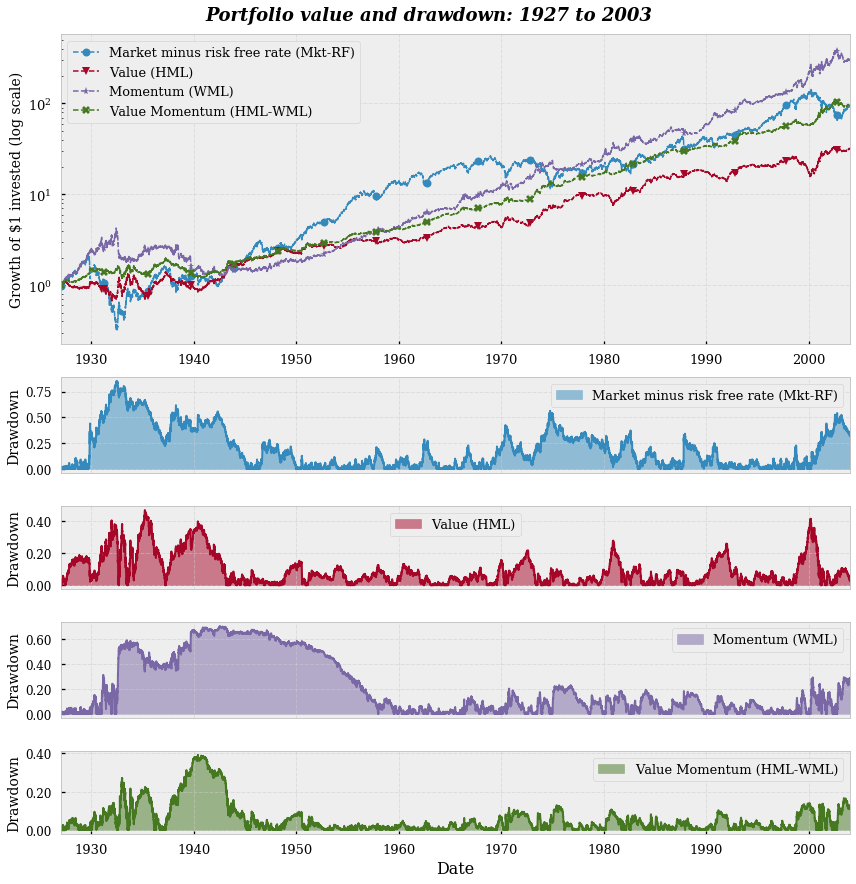

In [11]:
start, end = datetime.date(year=1927, month=1, day=1), datetime.date(year=2004,
                                                                     month=1,
                                                                     day=1)
df_before_15_27 = df_factors_log.loc[start:end]
Return_DD(df=df_before_15_27, dic_labels=dic_fac, time_frequency=FREQUENCY)

In [12]:
round(
    perf_stat(df=df_before_15_27.iloc[:, :4], all_stats=True, dic_perf=perf_stats_dic),
    3)

Mkt-RF        HML        WML    HML-WML
Count                       20466.000  20466.000  20466.000  20466.000
Skew                           -0.425      0.612     -2.281     -0.227
Kurtosis                       19.193     16.103     44.125     16.099
Median                          0.060      0.010      0.060      0.030
Mean                            0.022      0.017      0.028      0.022
SD                              1.048      0.576      0.711      0.433
Terminal Wealth Relative       95.715     31.253    288.765     95.532
Median Return (%)              15.115      2.520     15.115      7.559
Arithmetic Return (%)           5.629      4.277      6.980      5.627
Geometric Return (%)            5.791      4.370      7.230      5.788
Arithmetric Volatility (%)     16.644      9.149     11.287      6.877
Geometric Volatility (%)       18.109      9.581     11.949      7.119
Arithmetic SR                   0.338      0.467      0.618      0.818
Geometric SR                    0.320      0.456      0.605      0.813
Kappa Ratio                     0.690      1.078      1.064      1.724
Max Drawdown (%)               84.802     46.788     69.927     39.256
Calmar Ratio                    0.066      0.091      0.100      0.143
Max TUW (Year)                 18.369      7.083     28.845      9.440
Underwater (%)                 93.184     95.129     92.925     91.088
(%) Underwater >20 %           39.040     13.647     36.534      8.028

In [13]:
# perf stats to choose from
perf_stats_dic.keys()

dict_keys(['Count', 'Skew', 'Kurtosis', 'Median', 'Mean', 'SD', 'Terminal Wealth Relative', 'Median Return (%)', 'Arithmetic Return (%)', 'Geometric Return (%)', 'Arithmetric Volatility (%)', 'Geometric Volatility (%)', 'Arithmetic SR', 'Geometric SR', 'Kappa Ratio', 'Max Drawdown (%)', 'Calmar Ratio', 'Max TUW (Year)', 'Underwater (%)', '(%) Underwater >20 %'])

In [14]:
sum_stats = [
    'Arithmetic Return (%)', 'Arithmetic SR', 'Calmar Ratio', 'Kappa Ratio'
]
investment_horizon = [len(df_15) / 252]  # in years
# store all the output in a dictionary
store_output_dic_63, store_output_dic_27 = {}, {}

### Comparison performance
 - last 15 years (2004-2019)
 - 1963 - 2003
 - 1927 - 2003

In [15]:
stats_15 = round(
    perf_stat(df=df_15.iloc[:, :4], all_stats=True,
              dic_perf=perf_stats_dic).loc[sum_stats, :], 3)
stats_15_63 = round(
    perf_stat(df=df_before_15_63.iloc[:, :4],
              all_stats=True,
              dic_perf=perf_stats_dic).loc[sum_stats, :], 3)
stats_15_27 = round(
    perf_stat(df=df_before_15_27.iloc[:, :4],
              all_stats=True,
              dic_perf=perf_stats_dic).loc[sum_stats, :], 3)

# append together
a = pd.concat([stats_15.T, stats_15_63.T, stats_15_27.T]).loc[:, sum_stats]
index = pd.MultiIndex.from_product([["2004-2019", "1963-2003", "1927-2003"],
                                    ["Mkt-Rf", "HML", 'WLM', 'HLM-WML']],
                                   names=["Period", "Portfolio"])

CI_df = round(pd.DataFrame(a.values, index=index, columns=a.columns), 4)
CI_df
#print(CI_df.loc[:,[f"Arithmetic Return (%)","Arithmetic SR","Calmar Ratio"]].to_latex())

Arithmetic Return (%)  Arithmetic SR  Calmar Ratio  \
Period    Portfolio                                                       
2004-2019 Mkt-Rf                     7.319          0.398         0.131   
          HML                       -0.883         -0.089        -0.026   
          WLM                        0.642          0.044         0.010   
          HLM-WML                    0.287          0.050         0.009   
1963-2003 Mkt-Rf                     4.543          0.315         0.081   
          HML                        5.487          0.775         0.133   
          WLM                        9.313          0.985         0.319   
          HLM-WML                    7.191          1.292         0.432   
1927-2003 Mkt-Rf                     5.629          0.338         0.066   
          HML                        4.277          0.467         0.091   
          WLM                        6.980          0.618         0.100   
          HLM-WML                    5.627          0.818         0.143   

                     Kappa Ratio  
Period    Portfolio               
2004-2019 Mkt-Rf           0.851  
          HML             -0.207  
          WLM              0.087  
          HLM-WML          0.118  
1963-2003 Mkt-Rf           0.621  
          HML              1.853  
          WLM              1.976  
          HLM-WML          2.615  
1927-2003 Mkt-Rf           0.690  
          HML              1.078  
          WLM              1.064  
          HLM-WML          1.724

<a id='2.1'></a>
## Simulation Period: 01-01-1963 till 31-12-2003 

<a id='2.1.1'></a>
###  Market 

NORMAL 


IID BOOTSTRAP 


CIRCULAR BOOTSTRAP 


STATIONARY BOOTSTRAP 



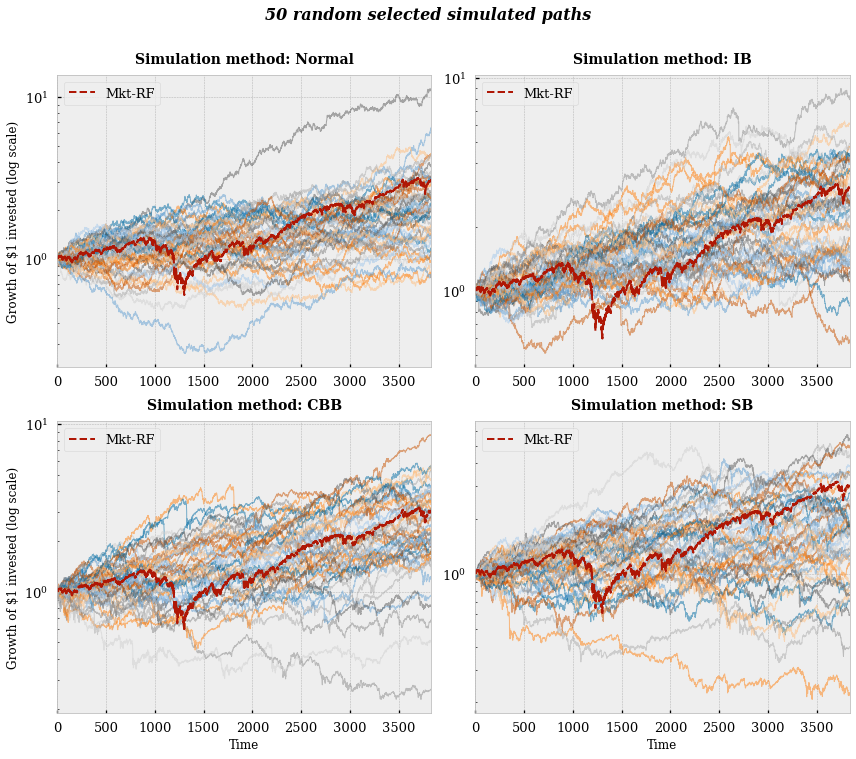

In [16]:
plt.style.use('tableau-colorblind10')
market_simulation_15_63 = Simulation(data=df_before_15_63.loc[:, ["Mkt-RF"]],
                                     n_paths=N_PATHS,
                                     blocksize=BLOCKSIZE,
                                     stats=sum_stats,
                                     perf_functions=perf_stats_dic,
                                     investment_horizon=investment_horizon,
                                     frequency=FREQUENCY,
                                     plotting=PLOT_INTERMEDIATE,
                                     store_output=store_output_dic_63,
                                     store_sim=True,
                                     add_noise=False)

market_simulation_15_63.normal()
market_simulation_15_63.iid_bootstrap()
market_simulation_15_63.cbb_bootstrap()
market_simulation_15_63.sb_bootstrap()
market_simulation_15_63.visualize(nr_paths=50,
                                  last_15=df_15.loc[:, ["Mkt-RF"]],
                                  size=(12, 10))

In [17]:
market_simulation_15_63.store_output.keys()

dict_keys(['Mkt-RF'])

<a id='2.1.2'></a>
### Value (HML) 

NORMAL 


IID BOOTSTRAP 


CIRCULAR BOOTSTRAP 


STATIONARY BOOTSTRAP 



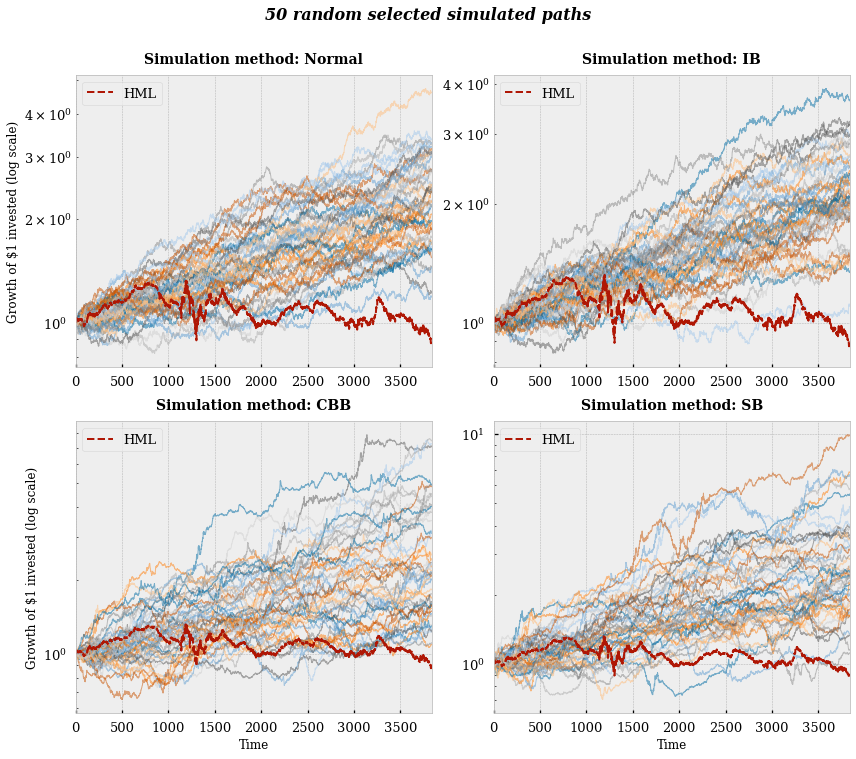

In [18]:
value_simulation_15_63 = Simulation(data=df_before_15_63.loc[:, ["HML"]],
                                    n_paths=N_PATHS,
                                    blocksize=BLOCKSIZE,
                                    stats=sum_stats,
                                    perf_functions=perf_stats_dic,
                                    investment_horizon=investment_horizon,
                                    frequency=FREQUENCY,
                                    plotting=PLOT_INTERMEDIATE,
                                    store_output=store_output_dic_63,
                                    store_sim=True,
                                    add_noise=False)

value_simulation_15_63.normal()
value_simulation_15_63.iid_bootstrap()
value_simulation_15_63.cbb_bootstrap()
value_simulation_15_63.sb_bootstrap()
value_simulation_15_63.visualize(nr_paths=50,
                                 last_15=df_15.loc[:, ["HML"]],
                                 size=(12, 10))

In [19]:
value_simulation_15_63.store_output.keys()

dict_keys(['Mkt-RF', 'HML'])

<a id='2.1.3'></a>
###  Momentum (WML) 

NORMAL 


IID BOOTSTRAP 


CIRCULAR BOOTSTRAP 


STATIONARY BOOTSTRAP 



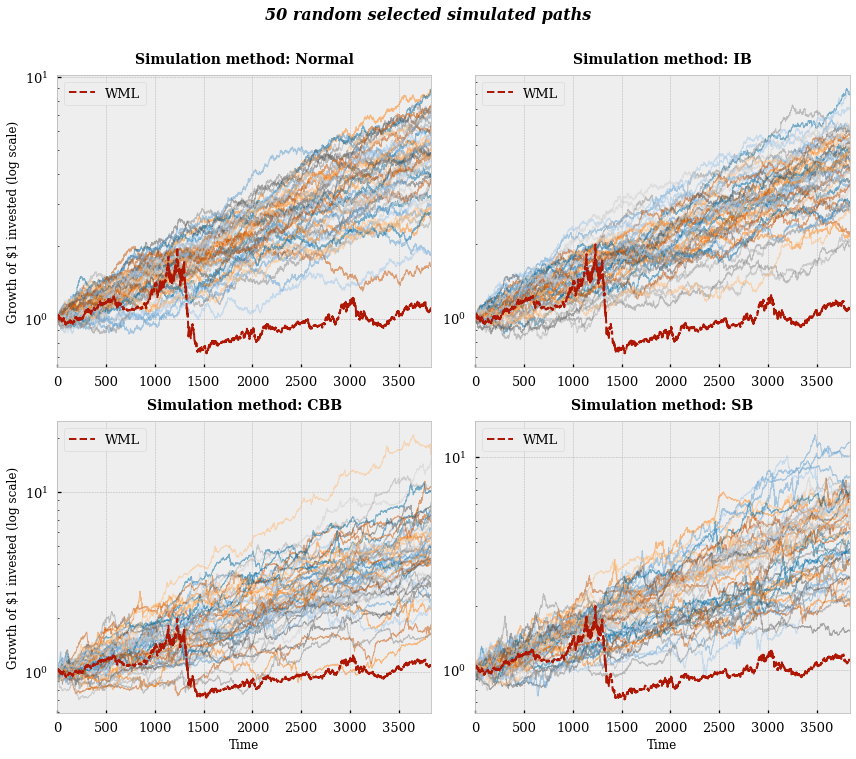

In [20]:
momentum_simulation_15_63 = Simulation(data=df_before_15_63.loc[:, ["WML"]],
                                       n_paths=N_PATHS,
                                       blocksize=BLOCKSIZE,
                                       stats=sum_stats,
                                       perf_functions=perf_stats_dic,
                                       investment_horizon=investment_horizon,
                                       frequency=FREQUENCY,
                                       plotting=PLOT_INTERMEDIATE,
                                       store_output=store_output_dic_63,
                                       store_sim=True,
                                       add_noise=False)

momentum_simulation_15_63.normal()
momentum_simulation_15_63.iid_bootstrap()
momentum_simulation_15_63.cbb_bootstrap()
momentum_simulation_15_63.sb_bootstrap()
momentum_simulation_15_63.visualize(nr_paths=50,
                                    last_15=df_15.loc[:, ["WML"]],
                                    size=(12, 10))

In [21]:
momentum_simulation_15_63.store_output.keys()

dict_keys(['Mkt-RF', 'HML', 'WML'])

<a id='2.1.3'></a>
### Value-Momentum (HML-WML) 

NORMAL 


IID BOOTSTRAP 


CIRCULAR BOOTSTRAP 


STATIONARY BOOTSTRAP 



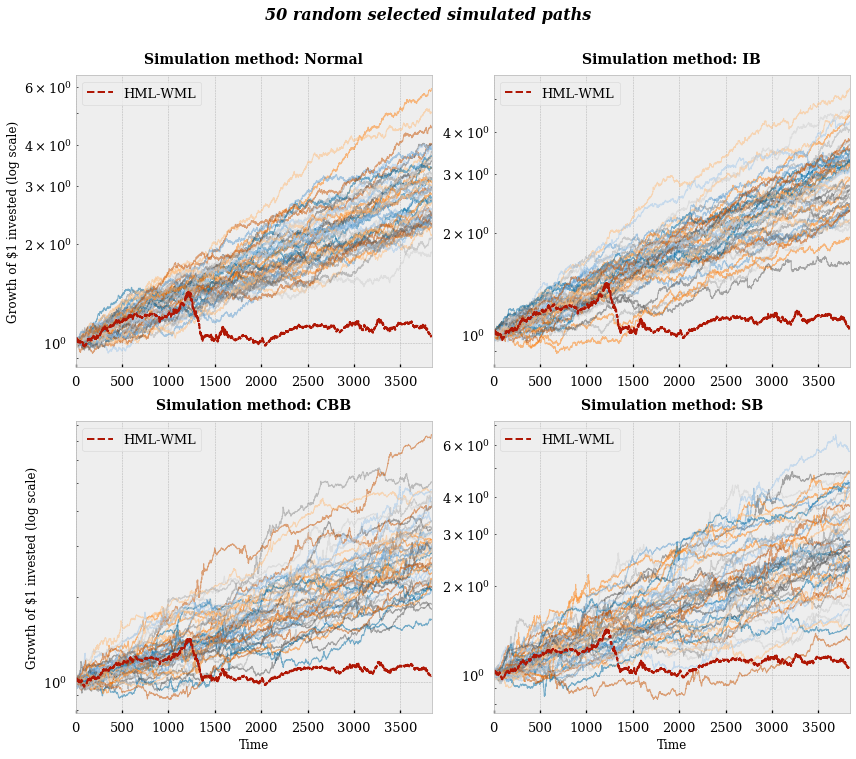

In [22]:
val_mom_simulation_15_63 = Simulation(data=df_before_15_63.loc[:, ["HML-WML"]],
                                      n_paths=N_PATHS,
                                      blocksize=BLOCKSIZE,
                                      stats=sum_stats,
                                      perf_functions=perf_stats_dic,
                                      investment_horizon=investment_horizon,
                                      frequency=FREQUENCY,
                                      plotting=PLOT_INTERMEDIATE,
                                      store_output=store_output_dic_63,
                                      store_sim=True,
                                      add_noise=False)

val_mom_simulation_15_63.normal()
val_mom_simulation_15_63.iid_bootstrap()
val_mom_simulation_15_63.cbb_bootstrap()
val_mom_simulation_15_63.sb_bootstrap()
val_mom_simulation_15_63.visualize(nr_paths=50,
                                   last_15=df_15.loc[:, ["HML-WML"]],
                                   size=(12, 10))

In [23]:
val_mom_simulation_15_63.store_output.keys()

dict_keys(['Mkt-RF', 'HML', 'WML', 'HML-WML'])

<a id='2.2'></a>
## Simulation Period: 01-01-1927 till 31-12-2003 

<a id='2.2.1'></a>
### Market (Mkt-RF) 

NORMAL 


IID BOOTSTRAP 


CIRCULAR BOOTSTRAP 


STATIONARY BOOTSTRAP 



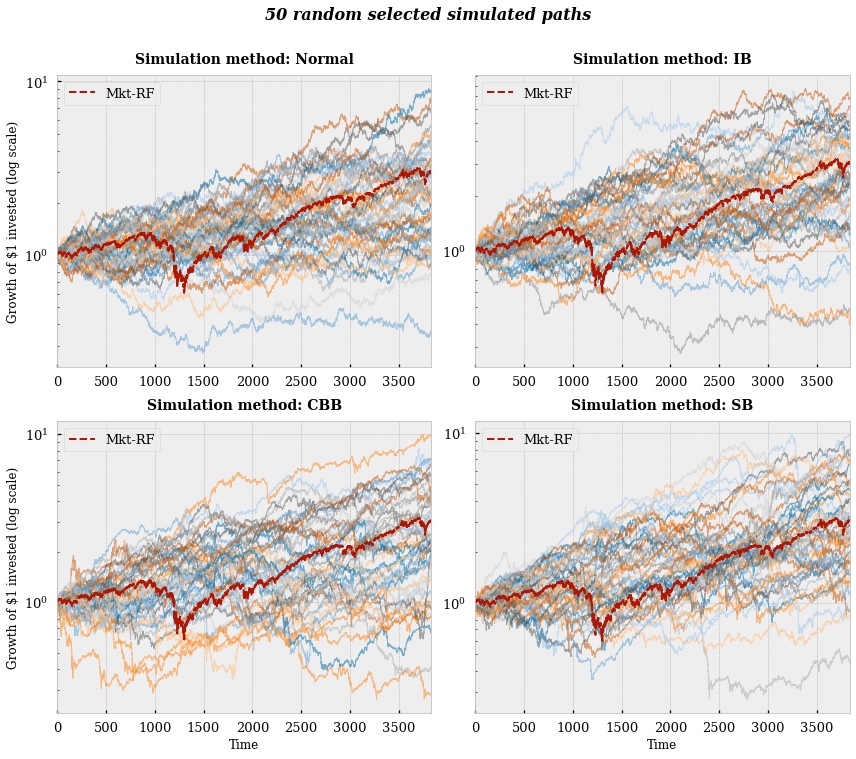

In [24]:
market_simulation_15_27 = Simulation(data=df_before_15_27.loc[:, ["Mkt-RF"]],
                                     n_paths=N_PATHS,
                                     blocksize=BLOCKSIZE,
                                     stats=sum_stats,
                                     perf_functions=perf_stats_dic,
                                     investment_horizon=investment_horizon,
                                     frequency=FREQUENCY,
                                     plotting=PLOT_INTERMEDIATE,
                                     store_output=store_output_dic_27,
                                     store_sim=True,
                                     add_noise=False)

market_simulation_15_27.normal()
market_simulation_15_27.iid_bootstrap()
market_simulation_15_27.cbb_bootstrap()
market_simulation_15_27.sb_bootstrap()
market_simulation_15_27.visualize(nr_paths=50,
                                  last_15=df_15.loc[:, ["Mkt-RF"]],
                                  size=(12, 10))

plt.savefig('Simulated_paths_27_mkt', bbox_inches='tight')  # save plot

In [25]:
market_simulation_15_27.store_output.keys()

dict_keys(['Mkt-RF'])

<a id='2.2.2'></a>
###  Value (HML) 

NORMAL 


IID BOOTSTRAP 


CIRCULAR BOOTSTRAP 


STATIONARY BOOTSTRAP 



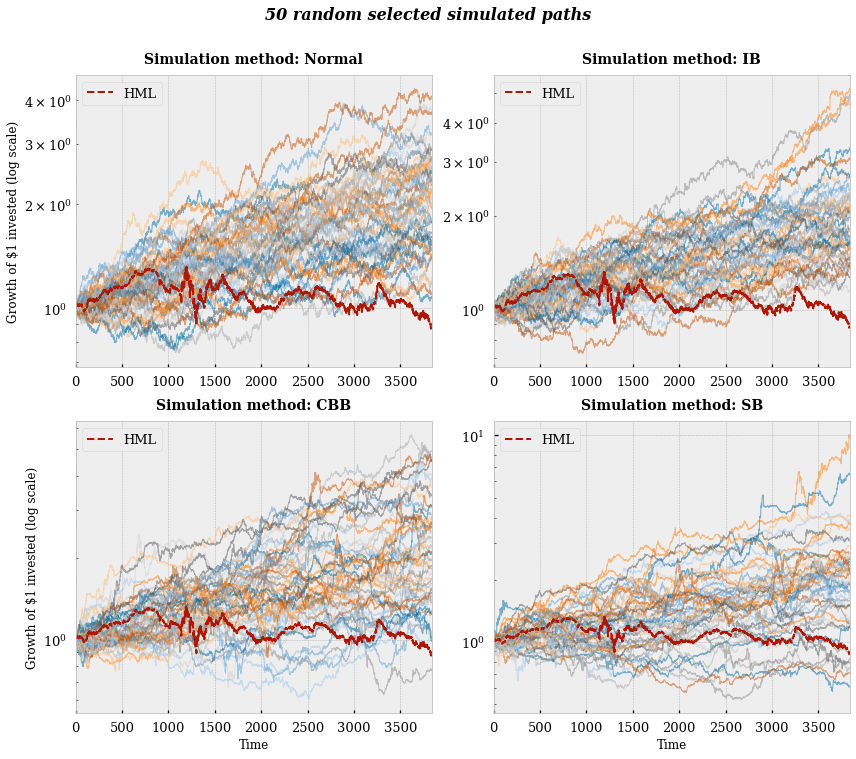

In [26]:
value_simulation_15_27 = Simulation(data=df_before_15_27.loc[:, ["HML"]],
                                    n_paths=N_PATHS,
                                    blocksize=BLOCKSIZE,
                                    stats=sum_stats,
                                    perf_functions=perf_stats_dic,
                                    investment_horizon=investment_horizon,
                                    frequency=FREQUENCY,
                                    plotting=PLOT_INTERMEDIATE,
                                    store_output=store_output_dic_27,
                                    store_sim=True,
                                    add_noise=False)

value_simulation_15_27.normal()
value_simulation_15_27.iid_bootstrap()
value_simulation_15_27.cbb_bootstrap()
value_simulation_15_27.sb_bootstrap()
value_simulation_15_27.visualize(nr_paths=50,
                                 last_15=df_15.loc[:, ["HML"]],
                                 size=(12, 10))

In [27]:
value_simulation_15_27.store_output.keys()

dict_keys(['Mkt-RF', 'HML'])

<a id='2.2.3'></a>
### Momentum (WML) 

NORMAL 


IID BOOTSTRAP 


CIRCULAR BOOTSTRAP 


STATIONARY BOOTSTRAP 



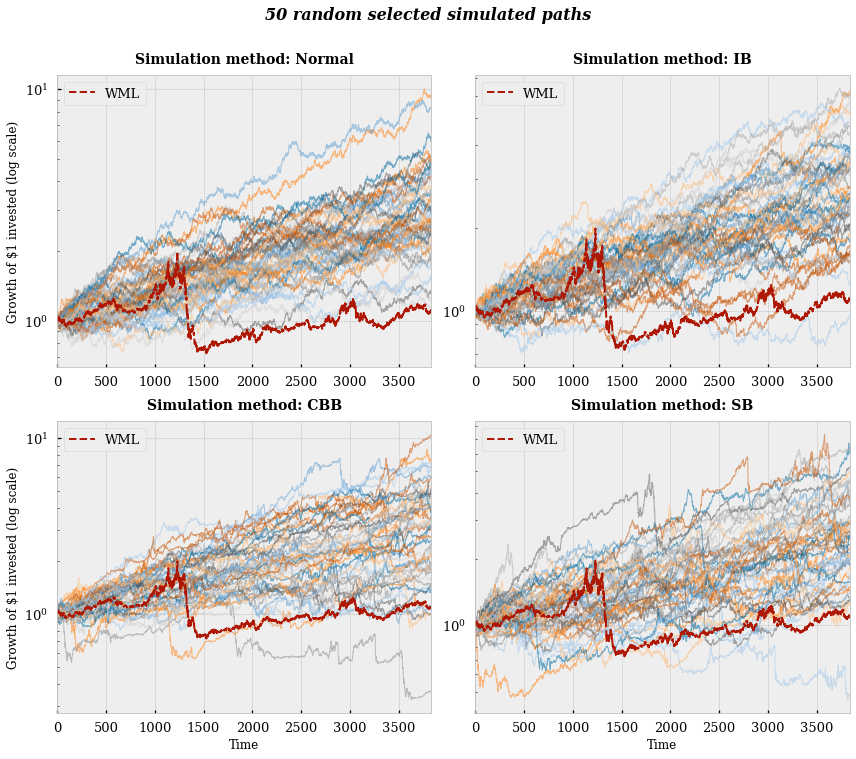

In [28]:
momentum_simulation_15_27 = Simulation(data=df_before_15_27.loc[:, ["WML"]],
                                       n_paths=N_PATHS,
                                       blocksize=BLOCKSIZE,
                                       stats=sum_stats,
                                       perf_functions=perf_stats_dic,
                                       investment_horizon=investment_horizon,
                                       frequency=FREQUENCY,
                                       plotting=PLOT_INTERMEDIATE,
                                       store_output=store_output_dic_27,
                                       store_sim=True,
                                       add_noise=False)

momentum_simulation_15_27.normal()
momentum_simulation_15_27.iid_bootstrap()
momentum_simulation_15_27.cbb_bootstrap()
momentum_simulation_15_27.sb_bootstrap()
momentum_simulation_15_27.visualize(nr_paths=50,
                                    last_15=df_15.loc[:, ["WML"]],
                                    size=(12, 10))

plt.savefig('Simulated_paths_27_wml', bbox_inches='tight')  # save plot

In [29]:
momentum_simulation_15_27.store_output.keys()

dict_keys(['Mkt-RF', 'HML', 'WML'])

<a id='2.2.4'></a>
### Value-Momentum (HML-WML) 

NORMAL 


IID BOOTSTRAP 


CIRCULAR BOOTSTRAP 


STATIONARY BOOTSTRAP 



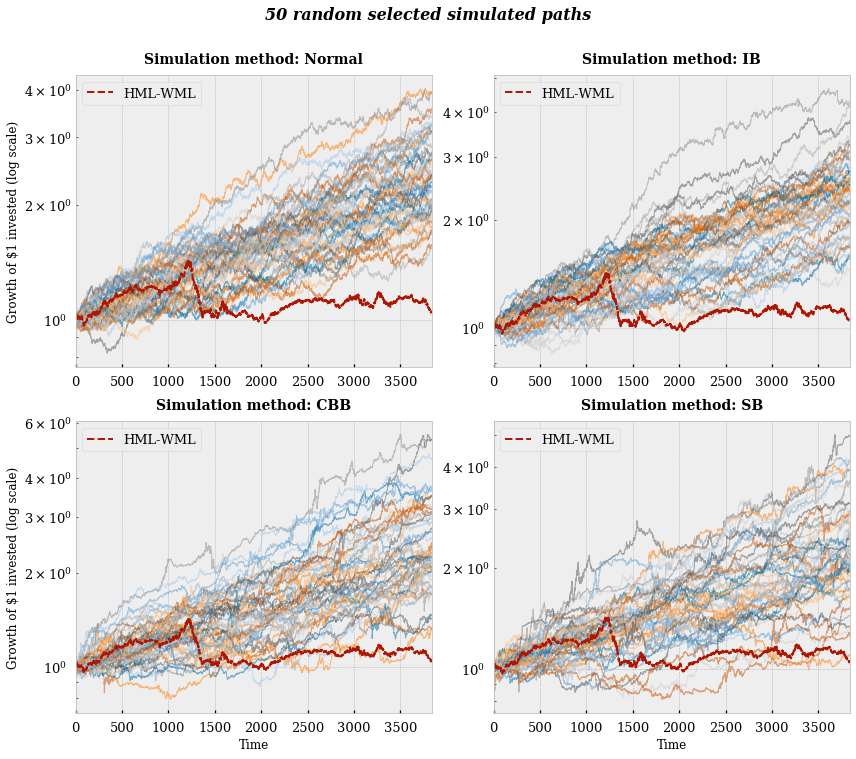

In [30]:
val_mom_simulation_15_27 = Simulation(data=df_before_15_27.loc[:, ["HML-WML"]],
                                      n_paths=N_PATHS,
                                      blocksize=BLOCKSIZE,
                                      stats=sum_stats,
                                      perf_functions=perf_stats_dic,
                                      investment_horizon=investment_horizon,
                                      frequency=FREQUENCY,
                                      plotting=PLOT_INTERMEDIATE,
                                      store_output=store_output_dic_27,
                                      store_sim=True,
                                      add_noise=False)

val_mom_simulation_15_27.normal()
val_mom_simulation_15_27.iid_bootstrap()
val_mom_simulation_15_27.cbb_bootstrap()
val_mom_simulation_15_27.sb_bootstrap()
val_mom_simulation_15_27.visualize(nr_paths=50,
                                   last_15=df_15.loc[:, ["HML-WML"]],
                                   size=(12, 10))

In [31]:
val_mom_simulation_15_27.store_output.keys()

dict_keys(['Mkt-RF', 'HML', 'WML', 'HML-WML'])

 <a id='2.3'></a>
## Summarize results

<a id='2.3.1'></a>
### Simulation Period: 01-01-1963 till 31-12-2003 

In [32]:
sum_stats

['Arithmetic Return (%)', 'Arithmetic SR', 'Calmar Ratio', 'Kappa Ratio']

In [33]:
# choose 2 stats to look at from the list above
stats1 = 'Arithmetic SR'
stats2 = 'Calmar Ratio'

#### Arithmetic SR

In [34]:
# observed performance over the last 15 years
perf_stat(df=df_15.iloc[:, :4],
          stats=[stats1],
          dic_perf=perf_stats_dic)

Mkt-RF       HML       WML   HML-WML
Arithmetic SR  0.397594 -0.089079  0.043753  0.050064

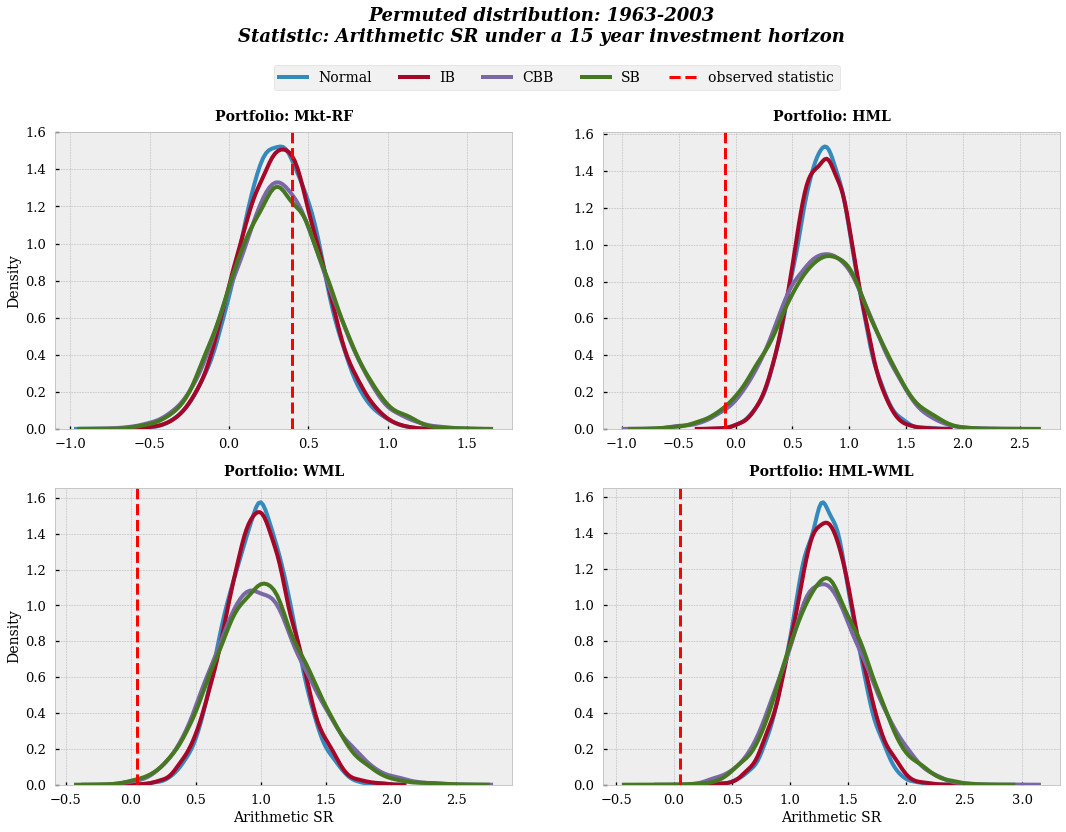

In [35]:
plt.style.use('bmh')
obs_T = perf_stat(df=df_15, stats=[stats1],
                  dic_perf=perf_stats_dic).values.tolist()[0]
permutation_plot(dic=val_mom_simulation_15_63.store_output,
                 investment_h=investment_horizon[0],
                 statistic=stats1,
                 period="1963-2003",
                 obs_stats=obs_T)
plt.savefig('SR_Density_63', bbox_inches='tight')

####  Calmar ratio

In [36]:
# observed maximum dd over the last 15 years
perf_stat(df=df_15.iloc[:, :4],
          stats=[stats2],
          dic_perf=perf_stats_dic)

Mkt-RF       HML       WML   HML-WML
Calmar Ratio  0.131124 -0.026046  0.010078  0.009192

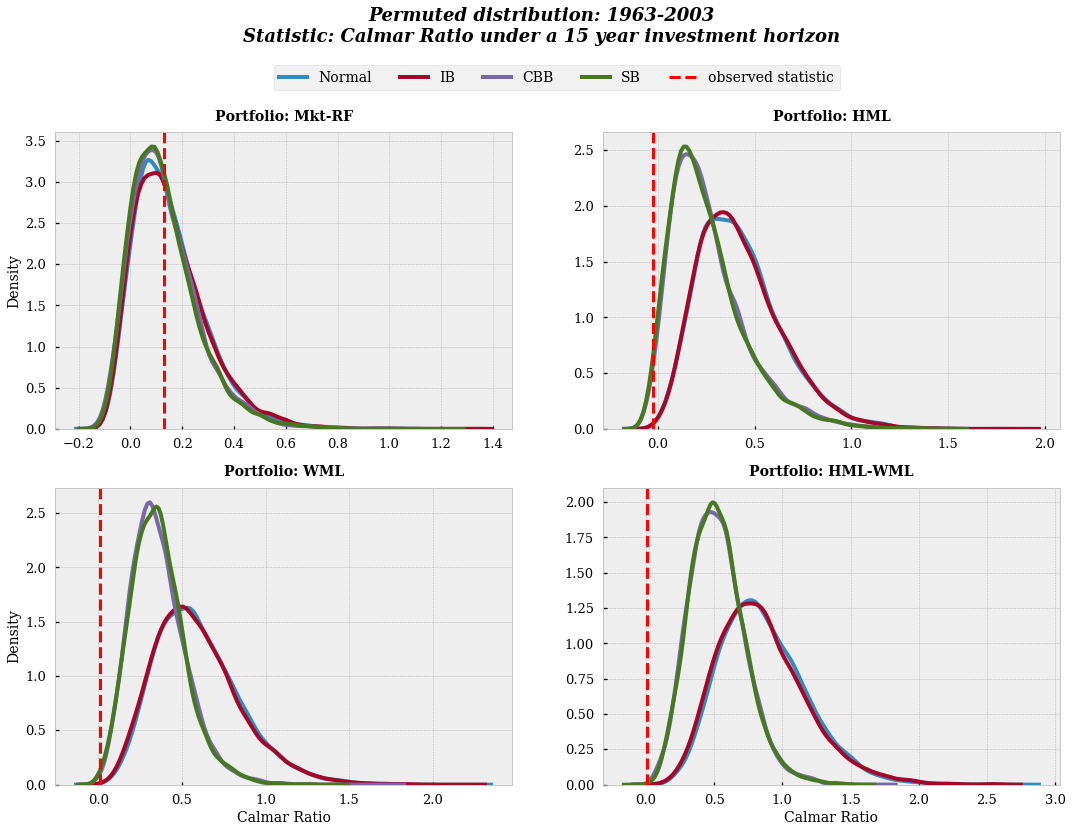

In [37]:
obs_T = perf_stat(df=df_15, stats=[stats2],
                  dic_perf=perf_stats_dic).values.tolist()[0]
permutation_plot(dic=val_mom_simulation_15_63.store_output,
                 investment_h=investment_horizon[0],
                 statistic=stats2,
                 period="1963-2003",
                 obs_stats=obs_T)
plt.savefig('Max_TUW_Density_63', bbox_inches='tight')

#### Numeric Summary Table: 01-01-1963 till 31-12-2003

The table below shows the number of returns paths with a more extreme statistic (more to the left except for drawdown this is right). The number of simulations was set at 10,000. 

In [38]:
out_63 = p_table(stat=sum_stats,
                 dic=val_mom_simulation_15_63.store_output,
                 observed=df_15,
                 perf_stats_dic=perf_stats_dic) / N_PATHS * 100
out_63
#print(out_63.loc[:,["Arithmetic SR","Max TUW (Year)"]].to_latex())

Performance statistic*     Arithmetic Return (%) Arithmetic SR Calmar Ratio  \
Portfolio Simulatin Method                                                    
Mkt-RF    Normal                           77.03         62.52        50.86   
          IB                               77.17         61.94        50.87   
          CBB                              73.91         59.31        56.18   
          SB                               74.09         58.84        56.72   
HML       Normal                            0.00          0.02         0.01   
          IB                                0.02          0.04         0.03   
          CBB                               1.59          2.02         1.30   
          SB                                1.79          2.26         1.44   
WML       Normal                            0.01          0.01         0.01   
          IB                                0.01          0.00         0.00   
          CBB                               0.27          0.21         0.19   
          SB                                0.35          0.30         0.26   
HML-WML   Normal                            0.00          0.00         0.00   
          IB                                0.00          0.00         0.00   
          CBB                               0.01          0.01         0.01   
          SB                                0.01          0.01         0.01   

Performance statistic*     Kappa Ratio  
Portfolio Simulatin Method              
Mkt-RF    Normal                 49.14  
          IB                     61.76  
          CBB                    58.90  
          SB                     59.40  
HML       Normal                  0.02  
          IB                      0.03  
          CBB                     2.03  
          SB                      2.31  
WML       Normal                  0.01  
          IB                      0.00  
          CBB                     0.21  
          SB                      0.29  
HML-WML   Normal                  0.00  
          IB                      0.00  
          CBB                     0.01  
          SB                      0.01

**Observations regarding the Arithmetic Return**

Below I describe my observations for the **annualized Arithmetic return**, similar conclusions hold for other performance statistics (except maybe for maximum drawdown)

The permuted distributions excludes the 15-year period ending 28 February 2019 from the analysis in creating
the 10,000 simulated histories of factor returns. If an investor uses these data to calibrate
expectations about performance over the next 15 years, **how probable would the actual
observed Arithmetic annual returns seem?**

As in chapter 3, I use a blocksize of 126 for the circular block bootstrap and the average blocksize for the stationary bootstrap is also set at 126 days. The p-value associated with the observed  returns are very low except for the market portfolio. Relative to the powerful returns from before 2004, the recent performance of the value, momentum and the value-momentum strategies over the past 15 years is unexpectedly low. There certainly are differences between the different simulation methods, though the main conclusion does not change.

<a id='2.3.2'></a>
### Simulation Period: 01-01-1927 till 31-12-2003 

#### Arithmetic return

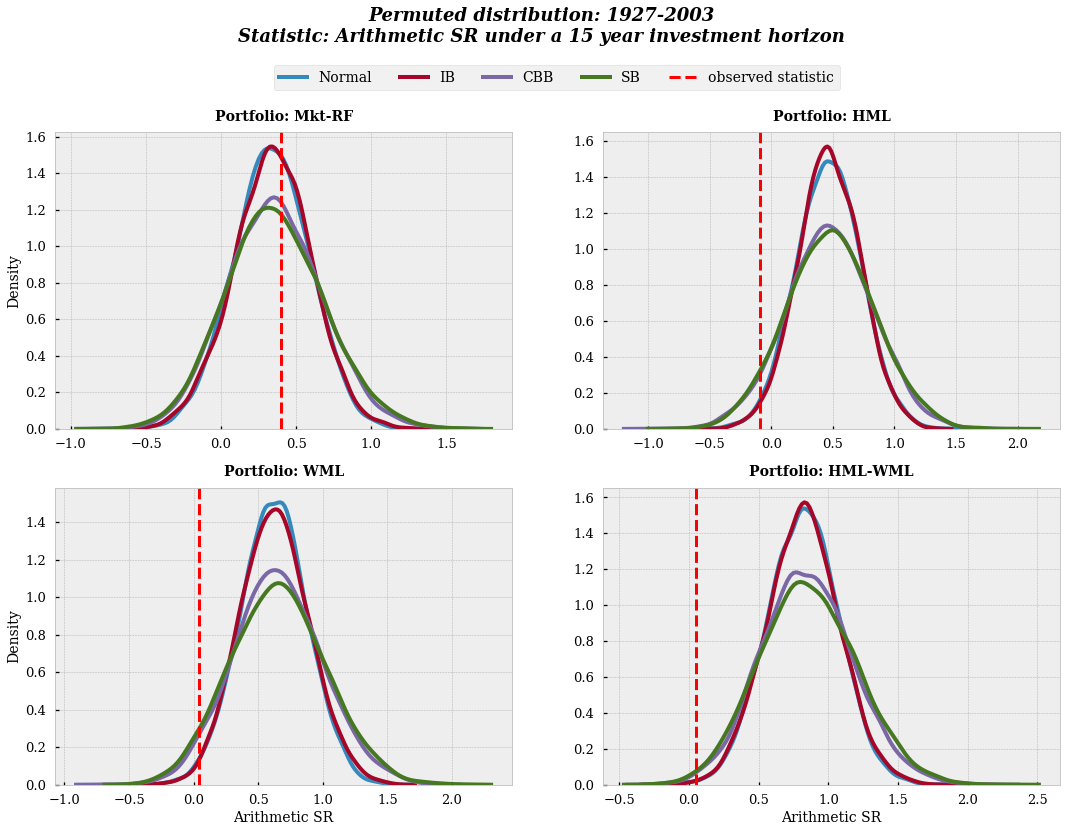

In [39]:
obs_T = perf_stat(df=df_15, stats=[stats1],
                  dic_perf=perf_stats_dic).values.tolist()[0]
permutation_plot(dic=val_mom_simulation_15_27.store_output,
                 investment_h=investment_horizon[0],
                 statistic=stats1,
                 period="1927-2003",
                 obs_stats=obs_T)
plt.savefig('SR_Density_27', bbox_inches='tight')

####  Calmar Ratio

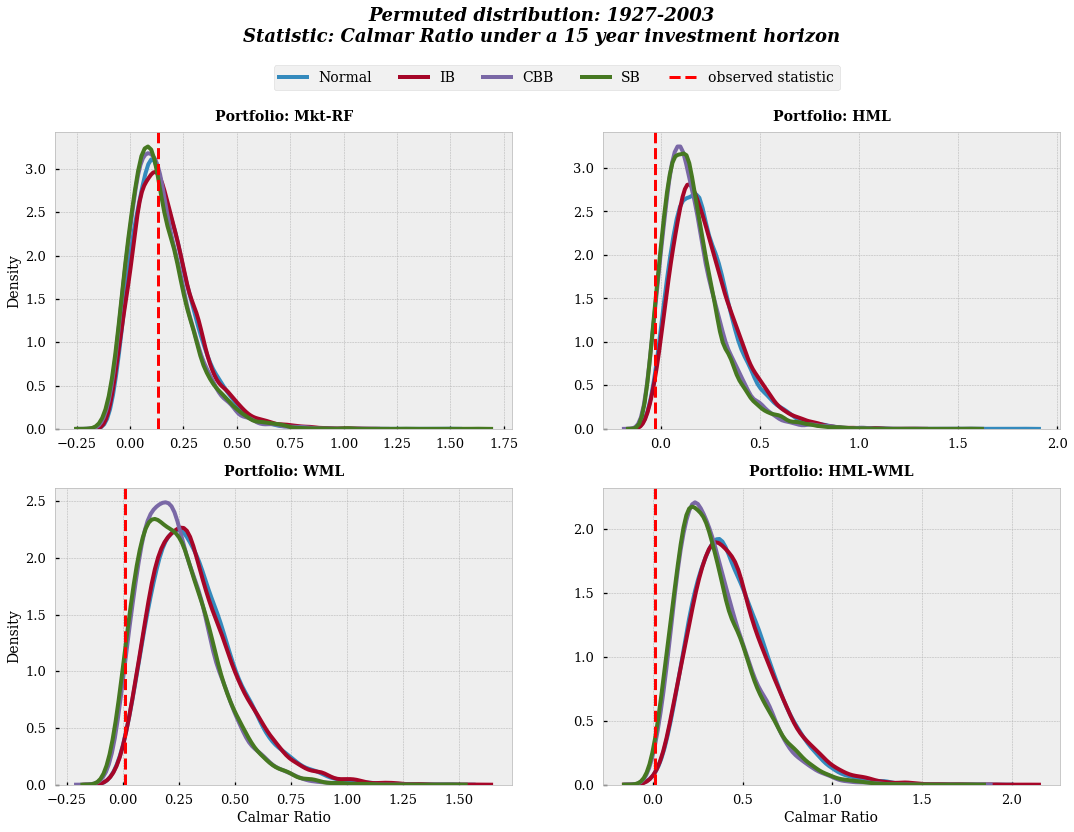

In [40]:
obs_T = perf_stat(df=df_15, stats=[stats2],
                  dic_perf=perf_stats_dic).values.tolist()[0]
permutation_plot(dic=val_mom_simulation_15_27.store_output,
                 investment_h=investment_horizon[0],
                 statistic=stats2,
                 period="1927-2003",
                 obs_stats=obs_T)
plt.savefig('Max_TUW_Density_27', bbox_inches='tight')

#### Numeric Summary Table: 01-01-1927 till 31-12-2003

The table below shows the number of returns paths with a more extreme statistic (more to to left except for drawdown this is right). The number of simulations was set at 10,000. 

In [41]:
out_27 = p_table(stat=sum_stats,
                 dic=val_mom_simulation_15_27.store_output,
                 observed=df_15,
                 perf_stats_dic=perf_stats_dic) / N_PATHS * 100

out_27
#print(out_27.loc[:,['Arithmetic SR','Max time in DD (Year)']].to_latex())

Performance statistic*     Arithmetic Return (%) Arithmetic SR Calmar Ratio  \
Portfolio Simulatin Method                                                    
Mkt-RF    Normal                           65.69         59.27        46.46   
          IB                               64.53         58.25        45.05   
          CBB                              62.91         56.04        52.67   
          SB                               63.30         56.10        54.01   
HML       Normal                            1.57          1.68         1.47   
          IB                                1.39          1.54         1.38   
          CBB                               5.28          5.72         4.60   
          SB                                5.43          5.70         4.55   
WML       Normal                            1.46          1.33         1.20   
          IB                                1.38          1.19         1.04   
          CBB                               4.15          3.89         3.82   
          SB                                5.00          4.77         4.73   
HML-WML   Normal                            0.21          0.22         0.21   
          IB                                0.16          0.19         0.17   
          CBB                               0.54          0.62         0.53   
          SB                                0.67          0.70         0.69   

Performance statistic*     Kappa Ratio  
Portfolio Simulatin Method              
Mkt-RF    Normal                 45.91  
          IB                     59.26  
          CBB                    56.57  
          SB                     56.72  
HML       Normal                  1.86  
          IB                      1.46  
          CBB                     5.71  
          SB                      5.68  
WML       Normal                  1.17  
          IB                      1.33  
          CBB                     4.17  
          SB                      5.11  
HML-WML   Normal                  0.21  
          IB                      0.22  
          CBB                     0.64  
          SB                      0.77

### Comparison 1963-2003 vs 1927-2003

In [42]:
stats = [i[0] for i in out_27.columns]
micol = pd.MultiIndex.from_product(
    [['Period 1963-2003', 'Period 1927-2003'], stats],
    names=['', 'Performance Statsitic'])
x = pd.concat([out_63.T, out_27.T]).T
x = pd.DataFrame(x.values, columns=micol, index=x.index)
x

Period 1963-2003                             \
Performance Statsitic      Arithmetic Return (%) Arithmetic SR Calmar Ratio   
Portfolio Simulatin Method                                                    
Mkt-RF    Normal                           77.03         62.52        50.86   
          IB                               77.17         61.94        50.87   
          CBB                              73.91         59.31        56.18   
          SB                               74.09         58.84        56.72   
HML       Normal                            0.00          0.02         0.01   
          IB                                0.02          0.04         0.03   
          CBB                               1.59          2.02         1.30   
          SB                                1.79          2.26         1.44   
WML       Normal                            0.01          0.01         0.01   
          IB                                0.01          0.00         0.00   
          CBB                               0.27          0.21         0.19   
          SB                                0.35          0.30         0.26   
HML-WML   Normal                            0.00          0.00         0.00   
          IB                                0.00          0.00         0.00   
          CBB                               0.01          0.01         0.01   
          SB                                0.01          0.01         0.01   

                                            Period 1927-2003                \
Performance Statsitic      Kappa Ratio Arithmetic Return (%) Arithmetic SR   
Portfolio Simulatin Method                                                   
Mkt-RF    Normal                 49.14                 65.69         59.27   
          IB                     61.76                 64.53         58.25   
          CBB                    58.90                 62.91         56.04   
          SB                     59.40                 63.30         56.10   
HML       Normal                  0.02                  1.57          1.68   
          IB                      0.03                  1.39          1.54   
          CBB                     2.03                  5.28          5.72   
          SB                      2.31                  5.43          5.70   
WML       Normal                  0.01                  1.46          1.33   
          IB                      0.00                  1.38          1.19   
          CBB                     0.21                  4.15          3.89   
          SB                      0.29                  5.00          4.77   
HML-WML   Normal                  0.00                  0.21          0.22   
          IB                      0.00                  0.16          0.19   
          CBB                     0.01                  0.54          0.62   
          SB                      0.01                  0.67          0.70   

                                                     
Performance Statsitic      Calmar Ratio Kappa Ratio  
Portfolio Simulatin Method                           
Mkt-RF    Normal                  46.46       45.91  
          IB                      45.05       59.26  
          CBB                     52.67       56.57  
          SB                      54.01       56.72  
HML       Normal                   1.47        1.86  
          IB                       1.38        1.46  
          CBB                      4.60        5.71  
          SB                       4.55        5.68  
WML       Normal                   1.20        1.17  
          IB                       1.04        1.33  
          CBB                      3.82        4.17  
          SB                       4.73        5.11  
HML-WML   Normal                   0.21        0.21  
          IB                       0.17        0.22  
          CBB                      0.53        0.64  
          SB                       0.69        0.77

#### Latex code

In [43]:
perf_stats = ["Arithmetic SR", "Kappa Ratio"]
micol = pd.MultiIndex.from_product(
    [['Period: 1963-2003', 'Period: 1927-2003'], perf_stats],
    names=['', 'Performance Statsitic'])
x = pd.concat([out_63.loc[:, perf_stats].T, out_27.loc[:, perf_stats].T]).T
x = pd.DataFrame(x.values, columns=micol, index=x.index)
print(x.to_latex())

\begin{tabular}{llrrrr}
\toprule
        & {} & \multicolumn{2}{l}{Period: 1963-2003} & \multicolumn{2}{l}{Period: 1927-2003} \\
        & Performance Statsitic &     Arithmetic SR & Kappa Ratio &     Arithmetic SR & Kappa Ratio \\
Portfolio & Simulatin Method &                   &             &                   &             \\
\midrule
Mkt-RF & Normal &             62.52 &       49.14 &             59.27 &       45.91 \\
        & IB &             61.94 &       61.76 &             58.25 &       59.26 \\
        & CBB &             59.31 &       58.90 &             56.04 &       56.57 \\
        & SB &             58.84 &       59.40 &             56.10 &       56.72 \\
HML & Normal &              0.02 &        0.02 &              1.68 &        1.86 \\
        & IB &              0.04 &        0.03 &              1.54 &        1.46 \\
        & CBB &              2.02 &        2.03 &              5.72 &        5.71 \\
        & SB &              2.26 &        2.31 &              5.70

<a id='Chapter3'></a>
# Chapter 3: Conclusion and discussion
 
**Recent past performance of value, momentum and a 60-40 value-momentum strategies are unexpectedly low**

It is no secret that value and momentum strategies have recently fallen far short of investor expectations. Is this a case of the factors being broken or have they just been unlucky over the last 15 years? The answer is probably a combination of both. Recent factor performance has been uncharacteristically bad given pre-2004 performance. Value (HML), momentum (WML) and 50-50 value-momentum (HML-WML) pre-2004 returns were likely inflated due to data mining and selection bias, and their post 2004 returns were likely depressed by crowding  as the factors gained widespread adoption. In contrary, the performance of the market portfolio (Mkt-RF) over the last 15 years is in line with historical expectations.

<a id='Chapter4'></a>
# Chapter 4: Limitations

**Assumptions being made**

- stationarity (check) and ergodicity
- all data over the whole sample is representative: contrary to other people I do think that data from 1927 is still useful. I believe  events like the crash in 1930 can happen again (actually the magnitude of 2007 was close to 1930).
  
- the sampled blocks are iid
  
- there are clear volatility regimes: these have clear impact on our bootstrap results. What are the implications?
  
- survivorship bias: the US stock market was one of the best investment choices an investor could have made. Therefore results in Chapter 3 are probably underestimated (in the negative sense) and are not generalizable to other countries. Furthermore, even in the US, very few investment firms outperform (on various statistics) the portfolios considered in this study (even before slippage and transactions costs).

- I assume an investor reinvest his money (no withdrawals), this might not be realistic in reality

- other important assumptions?

<a id='Chapter5'></a>
# Chapter 5: References

## Papers
- **[Arnott, R. D., Harvey, C. R., Kalesnik, V., & Linnainmaa, J. T. (2019). Alice’s Adventures in Factorland: Three Blunders  That Plague Factor Investing. Available at SSRN 3331680.](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3331680)**
- **[Fama, E. F., & French, K. R. (2018). Long-horizon returns. The Review of Asset Pricing Studies, 8(2), 232-252.](https://academic.oup.com/raps/article-abstract/8/2/232/4810768)**
- **[Fama, E. F., & French, K. R. (2012). Size, value, and momentum in international stock returns. Journal of financial economics, 105(3), 457-472.](https://www.sciencedirect.com/science/article/pii/S0304405X12000931)**
- **[Daniel, K., & Moskowitz, T. J. (2016). Momentum crashes. Journal of Financial Economics, 122(2), 221-247.](https://www.sciencedirect.com/science/article/pii/S0304405X16301490)**
- **[Radovanov, B., & Marcikić, A. (2014). A comparison of four different block bootstrap methods. Croatian Operational Research Review, 5(2), 189-202.](https://scholar.google.be/scholar?hl=nl&as_sdt=0%2C5&q=Radovanov%2C+B.%2C+%26+Marciki%C4%87%2C+A.+%282014%29.+A+comparison+of+four+different+block+bootstrap+methods.+Croatian+Operational+Research+Review%2C+5%282%29%2C+189-202&btnG=)**

- **[Singh, K., & Xie, M. (2008). Bootstrap: a statistical method. Unpublished manuscript, Rutgers University, USA. Retrieved from http://www. stat. rutgers. edu/home/mxie/RCPapers/bootstrap. pdf.](http://www.stat.rutgers.edu/home/mxie/stat586/handout/Bootstrap1.pdf)**
- **[Efron, B. (1992). Bootstrap methods: another look at the jackknife. In Breakthroughs in statistics (pp. 569-593). Springer, New York, NY.](https://scholar.google.be/scholar?hl=nl&as_sdt=0%2C5&q=Efron%2C+B.+%281979%29.+Bootstrap+methods%3A+Another+look+at+jackknife.+Ann.+Stat.+7%2C+1-26&btnG=)**

- **[Carlstein, E. (1986). The use of subseries values for estimating the variance of a general statistic from a stationary sequence. The annals of statistics, 14(3), 1171-1179.](https://scholar.google.be/scholar?hl=nl&as_sdt=0%2C5&q=Carlstein+%281986%29&btnG=)**

- **[Bailey, D. H., & Lopez de Prado, M. (2014). The deflated Sharpe ratio: Correcting for selection bias, backtest overfitting and non-normality. Journal of Portfolio Management, 40(5), 94-107.](https://scholar.google.be/scholar?hl=nl&as_sdt=0%2C5&q=deflated+sharpe+ratio&btnG=)**

- **[Opdyke, J. D. J. (2007). Comparing Sharpe ratios: so where are the p-values?. Journal of Asset Management, 8(5), 308-336.](https://link.springer.com/article/10.1057/palgrave.jam.2250084)**

## Blogs, websites, presentations ...

- **http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html**
- **http://keplerianfinance.com/2013/06/the-relevance-of-history/**
- **https://www.youtube.com/watch?v=27x632vOjXk&t=3349s**
- **https://www.youtube.com/watch?v=BtiqH_7d2es&t=28s**
- **http://www.blackarbs.com/blog/synthetic-data-generation-part-1-block-bootstrapping**
- **https://arch.readthedocs.io/en/latest/bootstrap/timeseries-bootstraps.html**
- **https://pandas-datareader.readthedocs.io/en/latest/remote_data.html**
- **http://www.ievbras.ru/ecostat/Kiril/R/Biblio_N/R_Eng/Chernick2011.pdf?fbclid=IwAR1f8UAc6s7FAGykclIB0usn0U9RGibNf6sB5ug2z9DEx9DoCK7Q-8nMVLk**
- **http://www.quantdevel.com/public/CSP2015/Talk/BootstrappingTimeSeriesData.pdf?fbclid=IwAR3FiKvHjfrg9zGZkm8aa07vMT15PkpxAYFLqvR50uBdGIjOgM0AY0nsd2U**
- **https://www.youtube.com/watch?v=-M1UtvoajUY**
- **https://www.winton.com/research/value-size-and-momentum-a-likely-example-of-selection-bias**